# 🎵 Pure Synthetic Songs

<br>

This tutorial guides users through analyzing, visualizing, and generating synthetic birdsongs using the `wavesongs` Python package, which is based on the motor gestures for birdsongs model developed by [Prof. G. Mindlin](https://scholar.google.com.ar/citations?user=gMzZPngAAAAJ&hl=en).

If you are using Google Colab uncomment and execute the following cell:

In [1]:
# ! git clone https://github.com/wavesongs/wavesongs
# ! pip install wavesongs

# # enable hird party widgets (ipympl)
# from google.colab import output
# output.enable_custom_widget_manager()

# # correct ProjDirs parameters,
# audios = "/content/wavesongs/assets/audio"
# results = "/content/wavesongs/assets/audio/results"

:::{note}
If you encounter an error message, reset the kernel and run the above cell again. After that, everything should work successfully.
:::

Then, follow the [installation guide](https://github.com/wavesongs/wavesongs#%EF%B8%8F-installation) to set up the evironment and install the required libraries.

## Libraries

Import the required classes and functions from `wavesongs`:

In [2]:
# Uncomment to enable interactive plots
# %matplotlib ipympl

from wavesongs.objs.syllable import Syllable
from wavesongs.utils.paths import ProjDirs
from wavesongs import plot
from wavesongs.models.bird import (
    _PARAMS, alpha_beta, motor_gestures
)

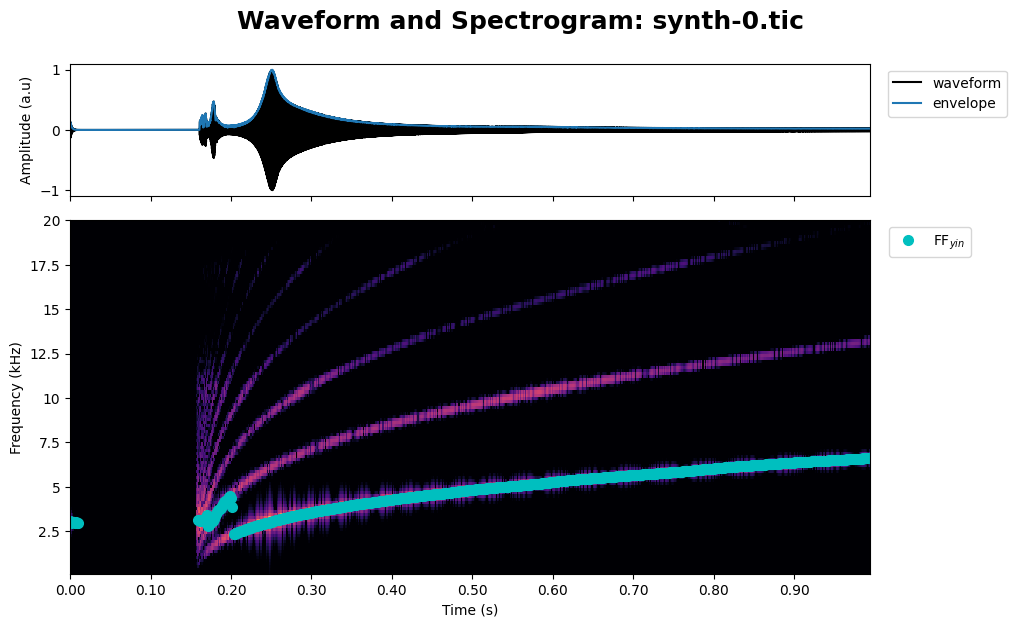

In [3]:
proj_dirs = ProjDirs(audios="./assets/audio", results="./assets/results")
synth = Syllable(proj_dirs=proj_dirs, duration=1, sr=44100)

# Synthetic parameters
z = {
    "a0": 0.11,
    "b0": -0.1,
    "b1": 1, 
    "b2": 0,
}

curves = alpha_beta(synth, z, method="fast")
synth = motor_gestures(synth, curves, _PARAMS)
synth.acoustical_features(umbral_FF=1.4, NN=256, ff_method="yin", flim=(1e2, 2e4))
plot.spectrogram_waveform(synth, ff_on=True, save=False)

In [4]:
synth.play()

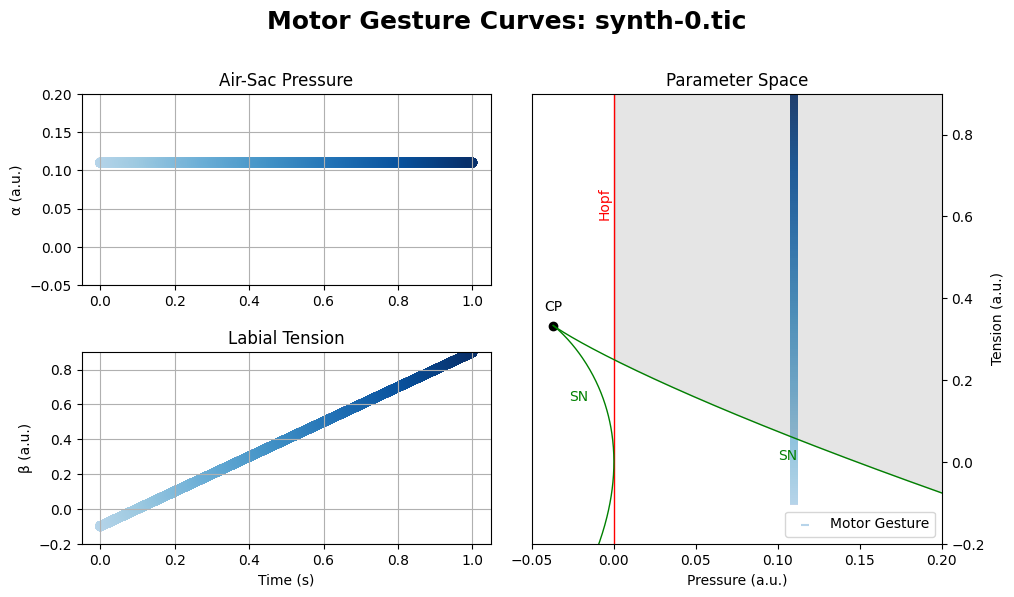

In [5]:
plot.alpha_beta(synth, save=False)

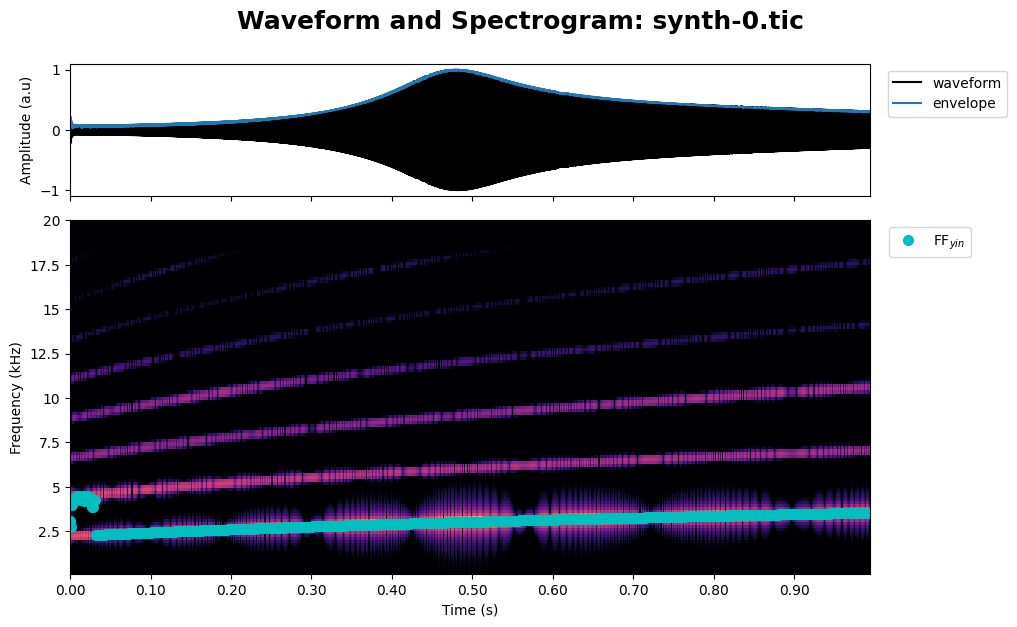

In [6]:
z_opt = {
    "a0": 0.11,
    "b0": 0.1,
    "b1": 0.1, 
    "b2": 0,
}

curves = alpha_beta(synth, z_opt, method="fast")
synth_opt = motor_gestures(synth, curves, _PARAMS)
synth_opt.acoustical_features(umbral_FF=1.4, NN=256, ff_method="yin", flim=(1e2, 2e4))
plot.spectrogram_waveform(synth_opt, ff_on=True, save=False)

In [7]:
synth_opt.play()

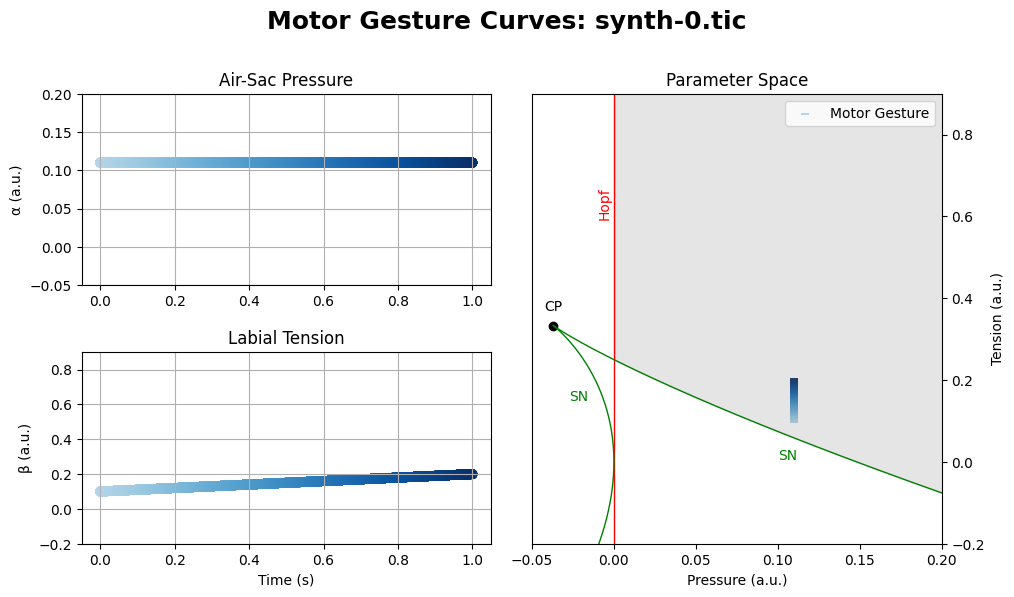

In [8]:
plot.alpha_beta(synth_opt, save=False)